# Data preprocessing

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

**Importing Dataset**

In [2]:
dataset = pd.read_csv('House Price India.csv')
dataset.fillna(dataset.mean(), inplace=True)
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

**Encoding catagorical data**

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5, 7, 8, 13])], remainder='passthrough')
X = ct.fit_transform(X)
X = X.toarray() if hasattr(X, 'toarray') else X

**Splitting data into traning set and test set**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Traning the model

**Adding input layer**

In [6]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)))

**Adding Hidden Layers**

In [7]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

**Adding Output Layer**

In [8]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

**Compiling and traning model**

In [9]:
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
366/366 [==============================] - 3s 4ms/step - loss: 179925303296.0000 - mean_absolute_error: 275338.6250
Epoch 2/100
366/366 [==============================] - 2s 5ms/step - loss: 27173644288.0000 - mean_absolute_error: 84859.7031
Epoch 3/100
366/366 [==============================] - 2s 7ms/step - loss: 22291658752.0000 - mean_absolute_error: 79371.7578
Epoch 4/100
366/366 [==============================] - 1s 4ms/step - loss: 19108982784.0000 - mean_absolute_error: 76148.5000
Epoch 5/100
366/366 [==============================] - 1s 4ms/step - loss: 17008776192.0000 - mean_absolute_error: 74124.7969
Epoch 6/100
366/366 [==============================] - 1s 4ms/step - loss: 16011011072.0000 - mean_absolute_error: 71409.7422
Epoch 7/100
366/366 [==============================] - 1s 4ms/step - loss: 15287100416.0000 - mean_absolute_error: 70954.3516
Epoch 8/100
366/366 [==============================] - 1s 4ms/step - loss: 14943335424.0000 - mean_absolute_error: 7

**Predicting results of test set**

In [10]:
y_pred = ann.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

92/92 [==============================] - 0s 2ms/step
[[229696.78125 253101.     ]
 [766326.6875  982000.     ]
 [437501.25    408000.     ]
 ...
 [666464.5625  537000.     ]
 [243535.25    260000.     ]
 [402907.375   405000.     ]]


# Visualizing results

**Plot for loss vs epocs and Mean absolute error vs epochs**

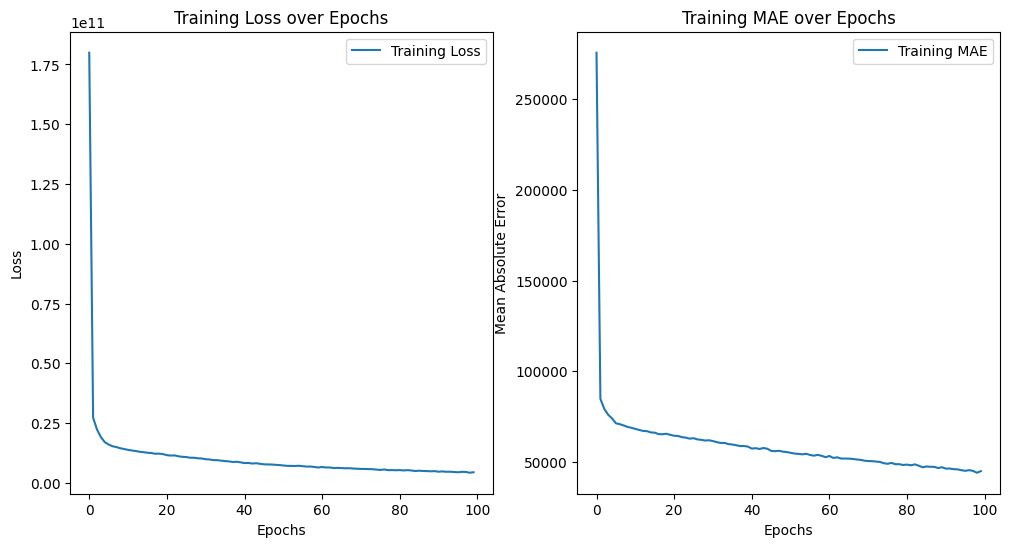

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.title('Training MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


**Actual price vs Predicted price (Scatter plot)**

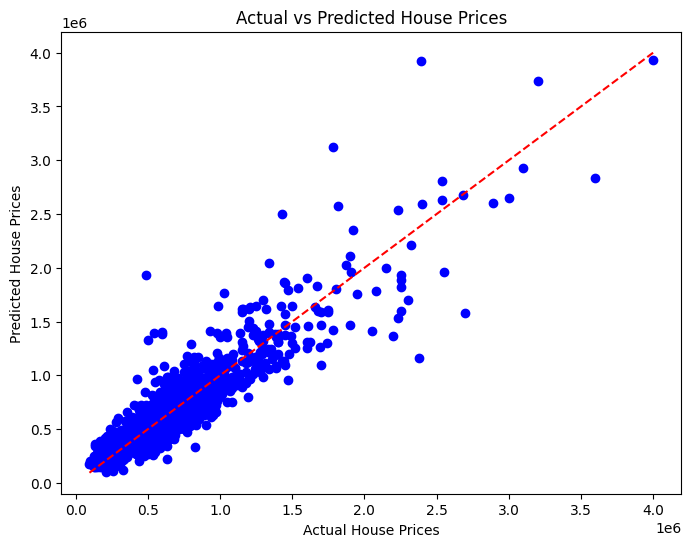

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()


**Error Distribution**

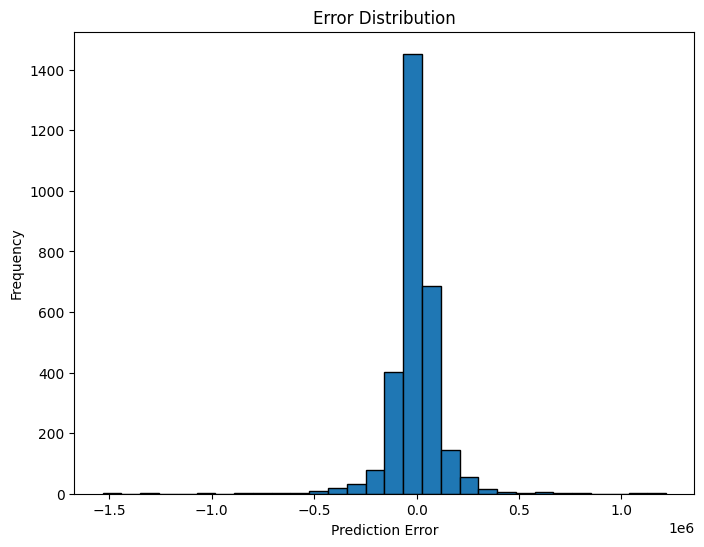

In [13]:
errors = y_test - y_pred.reshape(-1)

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


**Actual price vs Predicted price (Line Plot)**

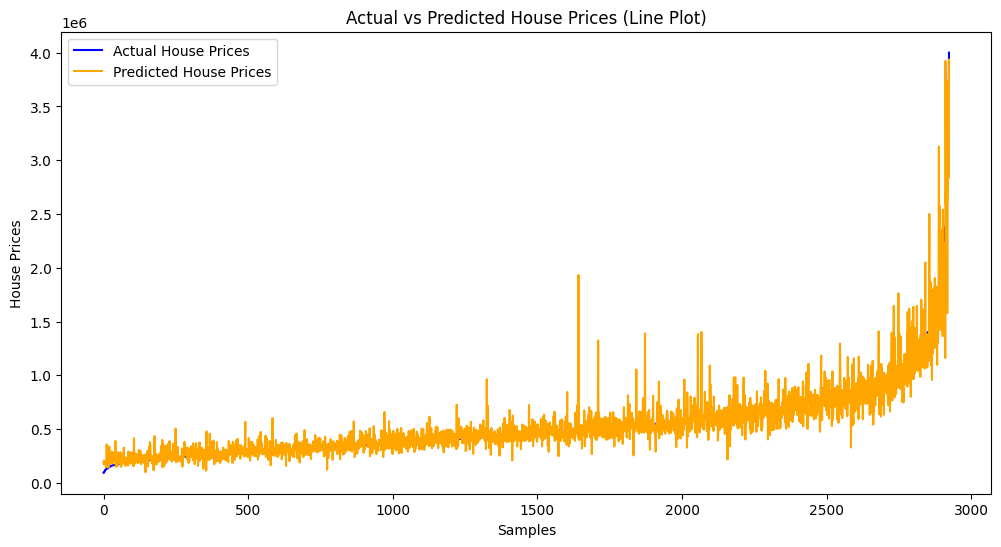

In [14]:
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label='Actual House Prices', color='blue')
plt.plot(y_pred_sorted, label='Predicted House Prices', color='orange')
plt.title('Actual vs Predicted House Prices (Line Plot)')
plt.xlabel('Samples')
plt.ylabel('House Prices')
plt.legend()
plt.show()
